In [21]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

# regardless of from where we run Jupyter Notebook, the curr working dir
# is personal/andrewe - i want to load pygolfdata from the location that's
# two directories above this one, so I'll modify the module search path
# to include that location. is there a better way to do this?
import sys
sys.path.append('../../')

from pygolfdata.data import shotlink

In [6]:
# data path - can be absolute, here is relative to the cwd of this file, 
# which is golf_course_project/personal/andrewe
data_path = '../../../golf_course_project_data'

In [7]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [8]:
cls = shotlink.get_courselevels([2017], data_path)
cls.shape

(3438, 34)

In [9]:
cls.columns

Index(['Year', 'CourseNum', 'CourseName', 'Round', 'Hole', 'FwyWidth250',
       'Actual250Distance', 'FwyWidth275', 'Actual275Distance', 'FwyWidth300',
       'Actual300Distance', 'FwyWidth325', 'Actual325 Distance', 'FwyWidth350',
       'Actual350Distance', 'FwyFirmness', 'GrnFirmness', 'GrnHeight',
       'RoughHeight', 'FwyHeight', 'Stimp', 'AMWindSpd', 'AMWindDir',
       'PMWindSpd', 'PMWind Dir', 'ScorecardYdg', 'ActualYdg', 'Par',
       'GreenGrass', 'FwyGrass', 'TeeGrass', 'BunkerGrass', 'RoughGrass',
       'ExtraColumn'],
      dtype='object')

In [10]:
cls['CourseNum'].value_counts(dropna=False)

185    126
819     72
752     72
742     72
734     72
714     72
704     72
700     72
688     72
660     72
656     72
552     72
538     72
510     72
500     72
240     72
238     72
236     72
232     72
36      72
32      72
12      72
6       72
746     72
766     72
789     72
770     72
771     72
733     72
729     72
669     72
665     72
513     72
503     72
241     72
239     72
237     72
235     72
23      72
21      72
19      72
11      72
9       72
5       72
800     72
776     72
4       72
Name: CourseNum, dtype: int64

In [11]:
mem_usage(cls)

'0.33 MB'

In [12]:
cls.dtypes

Year                    uint16
CourseNum               uint16
CourseName            category
Round                    uint8
Hole                     uint8
FwyWidth250             uint16
Actual250Distance       uint16
FwyWidth275             uint16
Actual275Distance       uint16
FwyWidth300             uint16
Actual300Distance       uint16
FwyWidth325             uint16
Actual325 Distance      uint16
FwyWidth350             uint16
Actual350Distance       uint16
FwyFirmness           category
GrnFirmness           category
GrnHeight              float32
RoughHeight            float32
FwyHeight              float32
Stimp                 category
AMWindSpd             category
AMWindDir             category
PMWindSpd             category
PMWind Dir            category
ScorecardYdg            uint16
ActualYdg              float32
Par                      uint8
GreenGrass            category
FwyGrass              category
TeeGrass              category
BunkerGrass           category
RoughGra

In [13]:
shotlink.shot_dtypes.keys()

odict_keys(['TourCode', 'TourDescription', 'Year', 'TournamentNum', 'PlayerNum', 'CourseNum', 'PermanentTournamentNum', 'PlayerFirstName', 'PlayerLastName', 'Round', 'TournamentName', 'CourseName', 'Hole', 'HoleScore', 'ParValue', 'Yardage', 'Shot', 'ShotType', 'NumStrokes', 'FromLocationScorer', 'FromLocationEnhanced', 'ToLocationScorer', 'ToLocationEnhanced', 'Distance', 'DistanceToPin', 'InTheHoleFlag', 'AroundTheGreenFlag', 'FirstPuttFlag', 'DistanceToHoleAfterShot', 'Time', 'Lie', 'Elevation', 'Slope', 'XCoordinate', 'YCoordinate', 'ZCoordinate', 'DistanceFromCenter', 'DistanceFromEdge', 'Date', 'LeftRight', 'StrokesGainedBaseline', 'StrokesGainedCategory', 'RecoveryShot'])

In [14]:
list(shotlink.shot_dtypes.keys())

['TourCode',
 'TourDescription',
 'Year',
 'TournamentNum',
 'PlayerNum',
 'CourseNum',
 'PermanentTournamentNum',
 'PlayerFirstName',
 'PlayerLastName',
 'Round',
 'TournamentName',
 'CourseName',
 'Hole',
 'HoleScore',
 'ParValue',
 'Yardage',
 'Shot',
 'ShotType',
 'NumStrokes',
 'FromLocationScorer',
 'FromLocationEnhanced',
 'ToLocationScorer',
 'ToLocationEnhanced',
 'Distance',
 'DistanceToPin',
 'InTheHoleFlag',
 'AroundTheGreenFlag',
 'FirstPuttFlag',
 'DistanceToHoleAfterShot',
 'Time',
 'Lie',
 'Elevation',
 'Slope',
 'XCoordinate',
 'YCoordinate',
 'ZCoordinate',
 'DistanceFromCenter',
 'DistanceFromEdge',
 'Date',
 'LeftRight',
 'StrokesGainedBaseline',
 'StrokesGainedCategory',
 'RecoveryShot']

In [15]:
cls['ActualYdg'].value_counts(dropna=False)

NaN       505
 437.0     31
 443.0     23
 442.0     23
 452.0     21
 430.0     20
 438.0     20
 444.0     20
 448.0     20
 421.0     19
 459.0     18
 434.0     18
 461.0     18
 406.0     18
 420.0     18
 435.0     18
 447.0     17
 454.0     17
 431.0     17
 451.0     17
 432.0     16
 467.0     16
 453.0     16
 457.0     16
 470.0     16
 456.0     16
 415.0     16
 393.0     16
 183.0     16
 189.0     16
         ... 
 585.0      1
 287.0      1
 331.0      1
 338.0      1
 649.0      1
 105.0      1
 123.0      1
 648.0      1
 293.0      1
 595.0      1
 594.0      1
 273.0      1
 251.0      1
 741.0      1
 607.0      1
 259.0      1
 773.0      1
 999.0      1
 358.0      1
 612.0      1
 660.0      1
 620.0      1
 614.0      1
 481.0      1
 764.0      1
 133.0      1
 995.0      1
 109.0      1
 333.0      1
 677.0      1
Name: ActualYdg, Length: 493, dtype: int64

In [16]:
foo = shotlink.get_shots([2017], data_path)
foo.shape

(1214437, 43)

In [17]:
foo.dtypes

TourCode                   category
TourDescription            category
Year                         uint16
TournamentNum                uint16
PlayerNum                    uint16
CourseNum                    uint16
PermanentTournamentNum       uint16
PlayerFirstName            category
PlayerLastName             category
Round                         uint8
TournamentName             category
CourseName                 category
Hole                          uint8
HoleScore                   float32
ParValue                      uint8
Yardage                      uint16
Shot                          uint8
ShotType                   category
NumStrokes                    uint8
FromLocationScorer         category
FromLocationEnhanced         object
ToLocationScorer           category
ToLocationEnhanced         category
Distance                     uint16
DistanceToPin                uint16
InTheHoleFlag              category
AroundTheGreenFlag         category
FirstPuttFlag              c

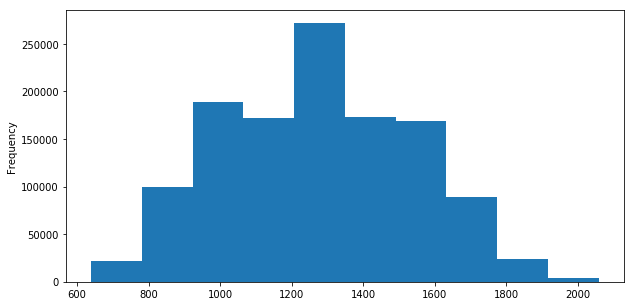

In [22]:
foo['Time'].plot.hist()

In [24]:
foo['Time'].min(), foo['Time'].max(), foo['Time'].max() - foo['Time'].min()

(640, 2058, 1418)

In [27]:
len(foo['TournamentNum'].unique())

42

In [28]:
foo.iloc[0]

TourCode                                                R
TourDescription                                  PGA TOUR
Year                                                 2017
TournamentNum                                          10
PlayerNum                                            1810
CourseNum                                             552
PermanentTournamentNum                                464
PlayerFirstName                                      Phil
PlayerLastName                                  Mickelson
Round                                                   1
TournamentName                               Safeway Open
CourseName                 Silverado Resort and Spa North
Hole                                                    1
HoleScore                                               5
ParValue                                                4
Yardage                                               436
Shot                                                    1
ShotType      

In [29]:
foo.dtypes

TourCode                   category
TourDescription            category
Year                         uint16
TournamentNum                uint16
PlayerNum                    uint16
CourseNum                    uint16
PermanentTournamentNum       uint16
PlayerFirstName            category
PlayerLastName             category
Round                         uint8
TournamentName             category
CourseName                 category
Hole                          uint8
HoleScore                   float32
ParValue                      uint8
Yardage                      uint16
Shot                          uint8
ShotType                   category
NumStrokes                    uint8
FromLocationScorer         category
FromLocationEnhanced         object
ToLocationScorer           category
ToLocationEnhanced         category
Distance                     uint16
DistanceToPin                uint16
InTheHoleFlag              category
AroundTheGreenFlag         category
FirstPuttFlag              c

In [14]:
foo['Date'] = pd.to_datetime(foo['Date'])

In [15]:
foo.dtypes

TourCode                         category
TourDescription                  category
Year                               uint16
TournamentNum                      uint16
PlayerNum                          uint16
CourseNum                          uint16
PermanentTournamentNum             uint16
PlayerFirstName                  category
PlayerLastName                   category
Round                               uint8
TournamentName                   category
CourseName                       category
Hole                                uint8
HoleScore                         float32
ParValue                            uint8
Yardage                            uint16
Shot                                uint8
ShotType                         category
NumStrokes                          uint8
FromLocationScorer               category
FromLocationEnhanced               object
ToLocationScorer                 category
ToLocationEnhanced               category
Distance                          

In [18]:
str(foo['Date'].dtype)

'datetime64[ns]'

In [31]:
list(range(2008, 2018))

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [33]:
shots_all_years = shotlink.get_shots(range(2008, 2018), data_path)
shots_all_years.shape

(11365769, 43)

The first time I ran the line below I got back 11,555mb, or ~11.5gb, however, my machine only shows Python using ~2.1gb total. The code below seems to run pretty quickly too.

In [34]:
mem_usage(shots_all_years)

'11555.21 MB'

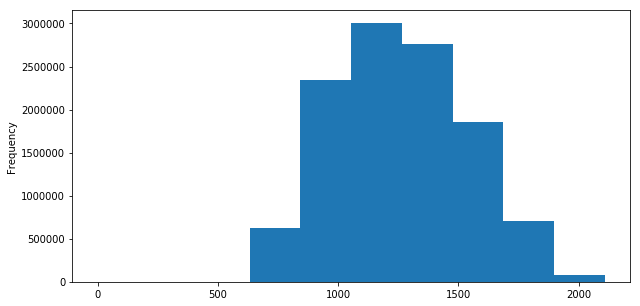

In [37]:
shots_all_years['Time'].plot.hist()

In [36]:
shots_all_years['Time'].min(), shots_all_years['Time'].max()

(0, 2109)

In [38]:
len(shots_all_years['Year'].unique())

10

In [39]:
len(shots_all_years['TournamentNum'].unique())

50

Total number of tournaments, for all years (I think).

In [41]:
len(shots_all_years.groupby(['Year','TournamentNum']).size())

392

In [43]:
foo.groupby(['TournamentNum','CourseName']).size()

TournamentNum  CourseName                    
10             Silverado Resort and Spa North    30418
30             CC of Jackson                     29723
50             TPC Summerlin                     30101
60             El Camaleon GC                    28562
70             Sea Island Resort (Plantation)    10969
               Sea Island Resort (Seaside)       21222
110            Plantation Course at Kapalua       9063
120            Waialae CC                        30430
130            La Quinta CC                      10910
               Nicklaus Tournament Course        11120
               Stadium Course                    16856
140            Torrey Pines (North)              11101
               Torrey Pines GC (South)           22523
150            TPC Scottsdale                    29217
160            Monterey Peninsula CC             11026
               Pebble Beach GL                   15908
               Spyglass Hill GC                  11116
170            Rivi